In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [3]:
file = pd.read_csv('50_Startups.csv')
file

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
one_hot_encode_cols = file.dtypes[file.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    file[col] = pd.Categorical(file[col])

# Do the one hot encoding
data_ = pd.get_dummies(file, columns=one_hot_encode_cols)

C:\Users\Admin\AppData\Local\Temp/ipykernel_7092/3505414109.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = file.dtypes[file.dtypes == np.object]  # filtering by string categoricals


In [13]:
one_hot_encode_cols

['State']

In [12]:
data_.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [6]:
train, test = train_test_split(data_, test_size=0.2,  random_state=42)

In [ ]:
feature_cols = [x for x in train.columns if x != 'Profit']
X_train = train[feature_cols]
y_train = train['Profit']

X_test  = test[feature_cols]
y_test  = test['Profit']

In [40]:
X_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
12,93863.75,127320.38,249839.44,0,1,0
4,142107.34,91391.77,366168.42,0,1,0
37,44069.95,51283.14,197029.42,1,0,0
8,120542.52,148718.95,311613.29,0,0,1
3,144372.41,118671.85,383199.62,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
41,27892.92,84710.77,164470.71,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
47,0.00,135426.92,0.00,1,0,0
15,114523.61,122616.84,261776.23,0,0,1


In [ ]:
LR= LinearRegression().fit(X_train, y_train)
predict = LR.predict(X_test)
score = LR.score(X_test, y_test)
score

0.8987266414329449

[Text(0.5, 0, 'Actual Profit'),
 Text(0, 0.5, 'Predicted Profit'),
 (0.0, 134307.35),
 (0.0, 134307.35),
 Text(0.5, 1.0, 'Linear Regression Results')]

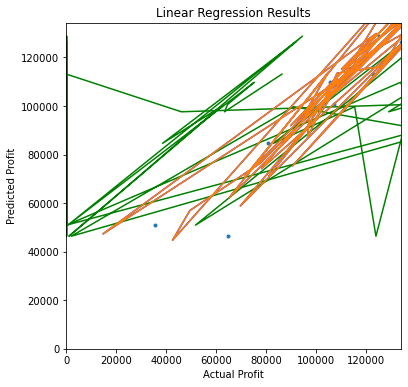

In [42]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(y_train, LR.predict(X_train), color='blue')
ax.plot(X_test, predict, color='green')
ax.plot(y_test, LR.predict(X_test), 
         marker='o', ls='', ms=3.0)
ax.plot(y_train, LR.predict(X_train))
lim = (0, y_test.max())

ax.set(xlabel='Actual Profit', 
       ylabel='Predicted Profit', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')